# Age Estimation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/CIS581/CIS_5810_Project_9_Classification_Student_Template_V2

/content/drive/MyDrive/Colab Notebooks/CIS581/CIS_5810_Project_9_Classification_Student_Template_V2


In [3]:
import os
import numpy as np
import torch
from helperT import *

# Loading Data

PyTorch Datasets are objects that have a single job: to return a single datapoint on request. The exact form of the datapoint varies between tasks: it could be a single image, a slice of a time series, a tabular record or something else entirely. These are then passed on to a Dataloader which handles batching of datapoints and parallelism.

We've written the dataloader function and transform function for you. `get_dataloaders()` will return three object: train_loader, val loader and test_loader.

```
Arguments:
    None
Return:
    train_loader      -- tensor,(y, x), [(32),(32, 2048)]
    val_loader        -- tensor,(y, x), [(32),(32, 2048)]
    test_loader       -- tensor,(y, x), [(32),(32, 2048)]
```

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


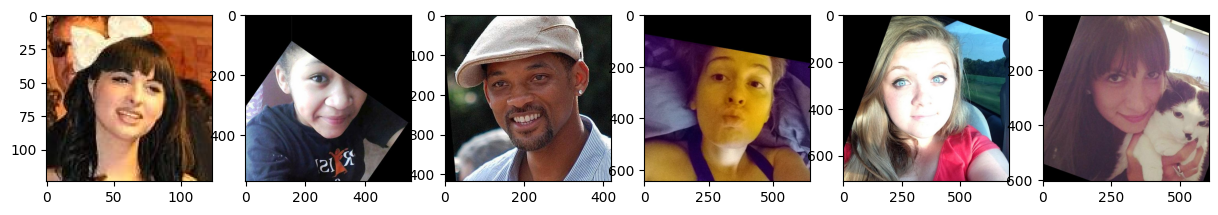

In [4]:
train_loader, val_loader, test_loader = get_dataloaders("DATASET/")
show_data('DATASET/')

# Define Linear Model
In this part, we will define our linear regression model here. First let's declare a class called `LinearClassifier` that inherit from `torch.nn.moudle`. Then you have to define the initialization in `__init__`, and define forward propogation in `forward` function.
Hint: You can use torch.nn.Linear.
```
Arguments:
    __init__        --(input_size, output_size)
Return:
    out      -- tensor, network calculation results
```


In [5]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearClassifier, self).__init__()
        #############################################
        # TODO: YOUR CODE HERE
        #############################################
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        #############################################
        # TODO: YOUR CODE HERE
        #############################################
        out = self.linear(x)
        return out

In [6]:
## Test ##
model = LinearClassifier(10, 2)
x = torch.zeros((5, 10))
y = model(x)
assert y.shape[0] == 5
assert y.shape[1] == 2
print('test passed')

test passed


## softmax + CELoss


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 0 	 mae: 6.437 	 loss: 3.767
Epoch: 1 	 mae: 5.748 	 loss: 3.533
Epoch: 2 	 mae: 5.561 	 loss: 3.424
Epoch: 3 	 mae: 5.403 	 loss: 3.360
Epoch: 4 	 mae: 5.371 	 loss: 3.318
Epoch: 5 	 mae: 5.349 	 loss: 3.289
Epoch: 6 	 mae: 5.316 	 loss: 3.267
Epoch: 7 	 mae: 5.293 	 loss: 3.251
Epoch: 8 	 mae: 5.253 	 loss: 3.239
Epoch: 9 	 mae: 5.225 	 loss: 3.230
Epoch: 10 	 mae: 5.200 	 loss: 3.223
Epoch: 11 	 mae: 5.186 	 loss: 3.217
Epoch: 12 	 mae: 5.201 	 loss: 3.213
Epoch: 13 	 mae: 5.192 	 loss: 3.209
Epoch: 14 	 mae: 5.156 	 loss: 3.207
Epoch: 15 	 mae: 5.141 	 loss: 3.204
Epoch: 16 	 mae: 5.133 	 loss: 3.203
Epoch: 17 	 mae: 5.133 	 loss: 3.201
Epoch: 18 	 mae: 5.111 	 loss: 3.200
Epoch: 19 	 mae: 5.107 	 loss: 3.200
Epoch: 20 	 mae: 5.102 	 loss: 3.199
Epoch: 21 	 mae: 5.093 	 loss: 3.199
Epoch: 22 	 mae: 5.093 	 loss: 3.199
Epoch: 23 	 mae: 5.113 	 loss: 3.199
Epoch: 24 	 mae: 5.103 	 loss: 3.199
Epoch: 25 	 mae: 5.108 	 loss: 3.200
Epoch: 26 	 mae: 5.117 	 loss: 3.200
Epoch: 27 	

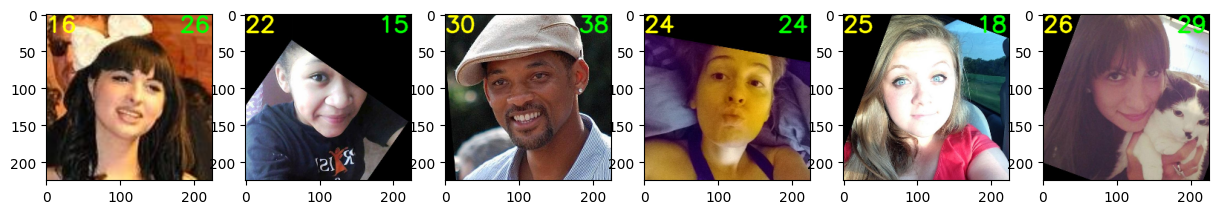

In [7]:
def train_softmax_cel():
    # TODO: Define model
    model = LinearClassifier(2048, 101).cuda()

    # TODO: Define SGD optimizer to update our weights and bias
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # TODO: Define cross entropy loss criterion to calculate loss
    criterion = torch.nn.CrossEntropyLoss()

    for e in range(EPOCH):
        # Training model
        model.train()
        for i, (y, x) in enumerate(train_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            # calculate the gradient and update the model
            x, y = x.cuda().float(), y.cuda().long()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()


        # Validating model
        model.eval()
        gt = []
        preds = []
        current_loss = 0
        for i, (y, x) in enumerate(val_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            # Calculate the validation outputs and validation loss in current epoch
            x, y = x.cuda().float(), y.cuda().long()
            outputs = model(x)
            current_loss = criterion(outputs, y).item()

            # Save the predictions for validation sets and ground truth
            preds.append(torch.argmax(outputs, dim=-1).cpu().detach().numpy())
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)
        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        print(f"Epoch: {e} \t mae: {mae:.3f} \t loss: {current_loss:.3f}")

    print("=> training finished")
    return model, preds, gt

model_softmax_cel, preds, gt = train_softmax_cel()
show_results(preds, gt)

## Test and Generate results file

In [8]:
prediction = test_cel(model_softmax_cel, test_loader, "softmax_cel.txt")
print("Test results has saved to softmax_cel.txt")
print(prediction[:10])

Test results has saved to softmax_cel.txt
[26.10441172 61.86388405 49.66298575 21.27902967 31.58745462 35.33172237
 45.30800312 40.78939654 22.15315265 58.33690112]


# Multi-layer classifier

In this part you will define your own multi-layer classifier. This model will make use of hidden state and non-linear activation functions, to give our model even more expressivity.

The architecture of this classifier is up to you, so feel free to experiment with various different architectures and see what performs best. The only requirement is that your model have **at least 2 layers**, and contain **at least one non-linearity**. For example, you could try using two fully connected layers (nn.Linear modules), with a ReLU activation in between. You are encouraged to explore the various modules within the `torch.nn` library.

Fill in the following module `MyClassifier`, to define the initialization and forward pass, as you did above.

In [9]:
class MyClassifier(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(MyClassifier, self).__init__()
        #############################################
        # TODO: YOUR CODE HERE
        #############################################
        self.fc1 = torch.nn.Linear(inputSize, inputSize)
        self.fc2 = torch.nn.Linear(inputSize, 512)
        self.fc3 = torch.nn.Linear(512, outputSize)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        #############################################
        # TODO: YOUR CODE HERE
        #############################################
        output = self.relu(self.fc1(x))
        output = self.relu(self.fc2(output))
        output = self.fc3(output)
        return output

## Train multi-layer classifier

You may use whatever module you'd like for the criterion and optimizer. You are also welcome to tune the hyperparameters as desired or modify the training structure to get the optimal model.

Epoch: 0 	 mae: 5.276 	 loss: 3.269
Epoch: 1 	 mae: 5.109 	 loss: 3.347
Epoch: 2 	 mae: 4.989 	 loss: 3.334
Epoch: 3 	 mae: 5.182 	 loss: 3.267
Epoch: 4 	 mae: 5.149 	 loss: 3.158
Epoch: 5 	 mae: 5.098 	 loss: 3.143
Epoch: 6 	 mae: 5.116 	 loss: 3.285
Epoch: 7 	 mae: 5.103 	 loss: 3.269
Epoch: 8 	 mae: 5.135 	 loss: 3.155
Epoch: 9 	 mae: 5.145 	 loss: 3.221
Epoch: 10 	 mae: 5.113 	 loss: 3.320
Epoch: 11 	 mae: 5.225 	 loss: 3.233
Epoch: 12 	 mae: 5.200 	 loss: 3.346
Epoch: 13 	 mae: 5.083 	 loss: 3.211
Epoch: 14 	 mae: 5.242 	 loss: 3.255
Epoch: 15 	 mae: 5.225 	 loss: 3.245
Epoch: 16 	 mae: 5.165 	 loss: 3.314
Epoch: 17 	 mae: 5.107 	 loss: 3.427
Epoch: 18 	 mae: 5.097 	 loss: 3.220
Epoch: 19 	 mae: 5.210 	 loss: 3.405
Epoch: 20 	 mae: 5.119 	 loss: 3.206
Epoch: 21 	 mae: 5.049 	 loss: 3.239
Epoch: 22 	 mae: 5.132 	 loss: 3.274
Epoch: 23 	 mae: 5.044 	 loss: 3.412
Epoch: 24 	 mae: 5.006 	 loss: 3.290
Epoch: 25 	 mae: 5.026 	 loss: 3.253
Epoch: 26 	 mae: 5.087 	 loss: 3.348
Epoch: 27 	

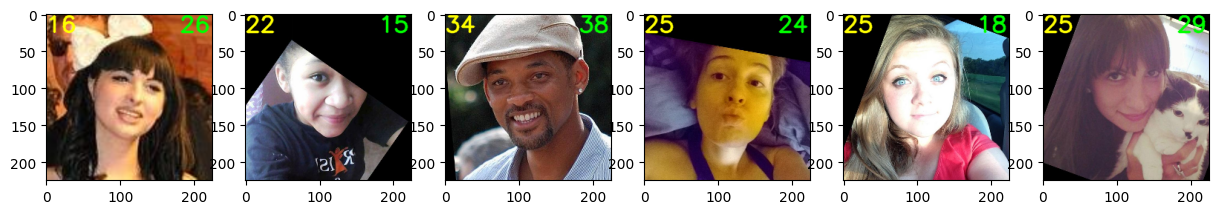

In [12]:
def train_my_classifier():
    # Define model
    model = MyClassifier(2048, 101).cuda()

    # Define an optimizer (from torch.optim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Define a loss function
    criterion = torch.nn.CrossEntropyLoss()

    for e in range(50):
        # Training model
        model.train()
        for i, (y, x) in enumerate(train_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            x, y = x.cuda().float(), y.cuda().long()
            # calculate the gradient and update the model
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()


        # Validating model
        model.eval()
        gt = []
        preds = []
        current_loss = 0
        for i, (y, x) in enumerate(val_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            # Calculate the validation outputs and validation loss in current epoch
            x, y = x.cuda().float(), y.cuda().long()
            outputs = model(x)
            current_loss = criterion(outputs, y).item()

            # Save the predictions for validation sets and ground truth
            preds.append(torch.argmax(outputs, dim=-1).cpu().detach().numpy())
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)
        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        print(f"Epoch: {e} \t mae: {mae:.3f} \t loss: {current_loss:.3f}")

    print("=> training finished")
    return model, preds, gt

model_multilayer, preds, gt = train_my_classifier()
show_results(preds, gt)

## Test and generate results file

In [13]:
prediction = test_cel(model_multilayer, test_loader, "results_multilayer.txt")
print("Test results has saved to results_multilayer.txt")
print(prediction[:10])

Test results has saved to results_multilayer.txt
[26.81761362 61.10286857 49.36373217 20.91919963 31.19217196 35.40745334
 55.90256282 40.99772439 21.44395509 57.39415469]


## Reflection

Finally, please briefly answer the reflection questions below.

- Describe your model's architecture, and any changes you made to the training process, if applicable. Be sure to describe any layers, their dimensions / number of channels, and activation functions; also include your choice of optimizer, loss function, and any hyperparameters you may have changed.
- How does your model perform, relative to your single-layer linear network?
- Were there any changes to the architecture you made to your classifier that made it perform worse?


Answer:


Architecture:

Input Layer: The input to the model has a size specified by inputSize

Hidden Layer self.fc1: A fully connected layer that takes the input and processes it through inputSize neurons, performing a linear transformation.

Hidden Layer self.fc2: Another linear layer that takes the output from fc1 and processes it through 512 neurons.

Output Layer self.fc3: a linear layer that takes the output from fc2 and processes it through outputSize neurons.

Activation Function: ReLU activation

Optimizer: Adam optimizer

Loss Function: Cross Entropy Loss


I don't see an improvement from my model to single-layer entwork. It is likely that linear layer does not perform well on image features. Higher model complexity does not contribute much to the accuracy of prediction. To perform better, images can be kept in 2D dimensions and perform CNN on them.